<a href="https://colab.research.google.com/github/ab2gbl/Master2/blob/main/AAI/TP/AAI_TP05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras import Input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense , BatchNormalization , Dropout
from keras.utils import to_categorical

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset/data")

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset


100%|██████████| 330M/330M [00:08<00:00, 38.7MB/s]


In [ ]:
train_dir='/content/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_dir='/content/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_dir='/content/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
target_size = (28, 28)
batch_size = 16

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

val_datagen  = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True,
    seed=42,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')



Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(3, kernel_size=(5, 5),activation='relu',input_shape=(28,28,3),name="layer1"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, kernel_size=(5, 5),activation='relu',input_shape=(12,12,1),name="layer2"))
model.add(MaxPooling2D(pool_size=(2, 2),name="layer3"))
model.add(Flatten())
model.add(Dense(500, activation='relu',name="layer4"))
model.add(Dense(2, activation='softmax',name="layer5"))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 52ms/step - accuracy: 0.8180 - loss: 0.4035 - val_accuracy: 0.8850 - val_loss: 0.2704
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.8838 - loss: 0.2815 - val_accuracy: 0.8850 - val_loss: 0.2850
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8891 - loss: 0.2686 - val_accuracy: 0.9162 - val_loss: 0.2121
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.8967 - loss: 0.2517 - val_accuracy: 0.9413 - val_loss: 0.1767
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 49ms/step - accuracy: 0.9035 - loss: 0.2360 - val_accuracy: 0.9350 - val_loss: 0.1607
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 48ms/step - accuracy: 0.9165 - loss: 0.2272 - val_accuracy: 0.9312 - val_loss: 0.1601
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.9046 - loss: 0.2325 - val_accuracy: 0.9413 - val_loss: 0.1506
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.9067 - loss: 0.2290 - val_accurac

In [ ]:
accu = model.evaluate(test_generator)[1]

 6/62 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9833 - loss: 0.0441

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9711 - loss: 0.0713


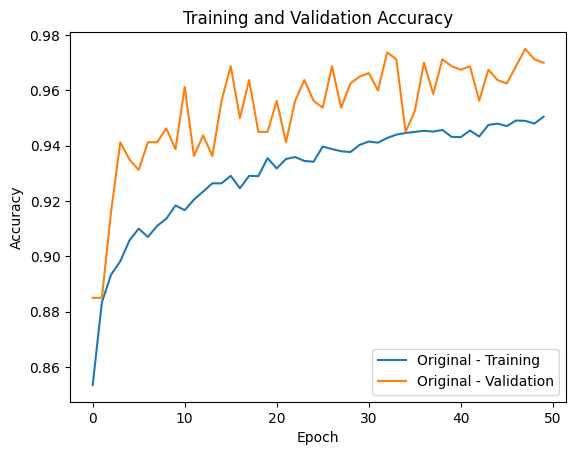

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Original - Training')
plt.plot(history.history['val_accuracy'], label='Original - Validation')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from keras.saving import save_model,load_model

#save_model(model, '/content/drive/MyDrive/Master2/AAI_TP05_model.keras')

In [ ]:
model=load_model('/content/drive/MyDrive/Master2/AAI_TP05_model.keras')

In [ ]:
from PIL import Image, ImageOps
import numpy as np

def preprocess_image(image_path):
    # Load the image in RGB mode
    img = Image.open(image_path).convert('RGB')  # Keep in RGB

    # Make the image square by padding
    width, height = img.size
    if width != height:
        # Calculate padding to make the image square
        max_dim = max(width, height)
        delta_w = max_dim - width
        delta_h = max_dim - height
        padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))
        img = ImageOps.expand(img, padding, fill=(0, 0, 0))  # Fill with black (RGB: (0, 0, 0))

    # Resize the image to 28x28
    img = img.resize((28, 28))

    # Convert image to a numpy array and normalize
    img_array = np.array(img) / 255.0

    return img_array


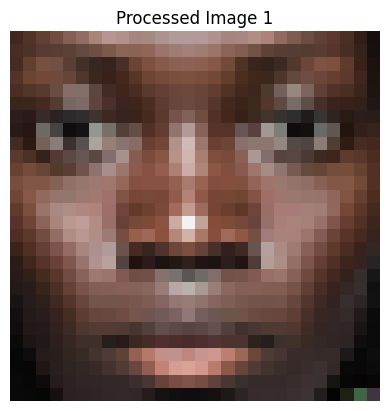

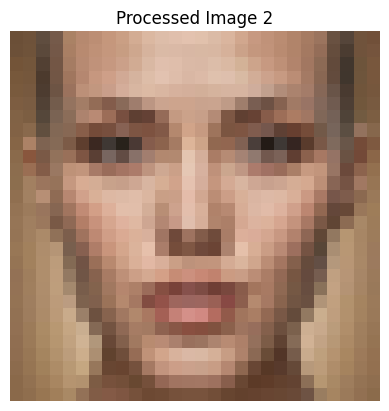

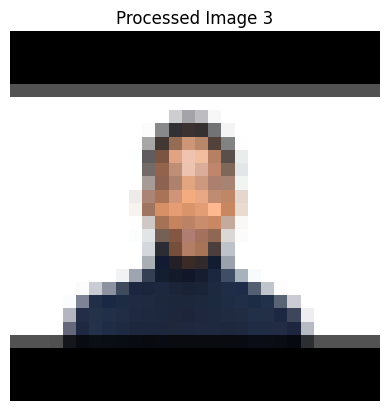

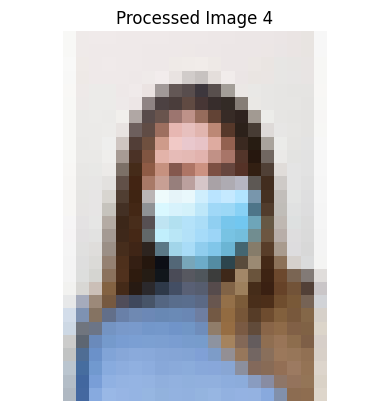

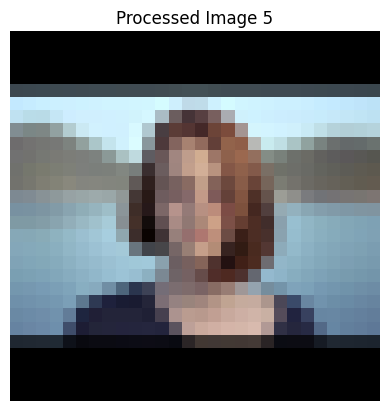

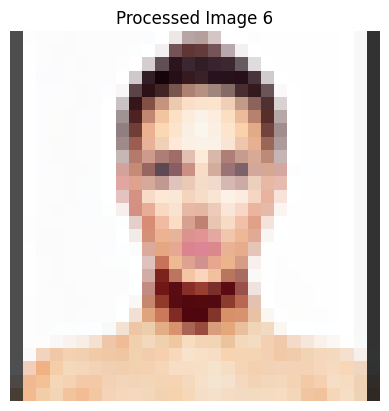

In [ ]:
# Paths to the downloaded images
image_paths = ['/nomask4.jpeg', '/nomask5.jpeg', '/nomask.jpeg', '/mask3.jpeg', '/nomask2.jpeg','/nomask3.jpeg']

# Preprocess each image and store in a list
processed_images = [preprocess_image(path) for path in image_paths]

# Display the processed images
for i, img_array in enumerate(processed_images):
    plt.figure()
    plt.imshow(img_array)
    plt.title(f"Processed Image {i+1}")
    plt.axis('off')  # Turn off axis for a cleaner look
    plt.show()



In [ ]:
class_names = [
    "mask","no mask"
]

images = np.array(processed_images)
predictions = model.predict(images)

for i, pred in enumerate(predictions):
    class_index = np.argmax(pred)  # Get the index of the class with the highest probability
    print(f"Image {i+1} predicted class: {class_names[class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Image 1 predicted class: no mask
Image 2 predicted class: no mask
Image 3 predicted class: mask
Image 4 predicted class: mask
Image 5 predicted class: mask
Image 6 predicted class: mask


In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/omkargurav/face-mask-dataset",data_dir='/content/new/')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdessamiguebli
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset


100%|██████████| 163M/163M [00:01<00:00, 96.1MB/s]


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set paths to the dataset folders
dataset_dir = '/content/new/face-mask-dataset/data/'  # Update to your dataset directory
mask_dir = os.path.join(dataset_dir, 'with_mask')
without_mask_dir = os.path.join(dataset_dir, 'without_mask')

# Set up new directories for train, validation, and test splits
split_base_dir = os.path.join(dataset_dir, 'split')
train_dir = os.path.join(split_base_dir, 'train')
val_dir = os.path.join(split_base_dir, 'validation')
test_dir = os.path.join(split_base_dir, 'test')

for category in ['mask', 'without_mask']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Function to split and move files
def split_and_move_files(category_dir, category_name):
    # Get all images in the category folder
    images = os.listdir(category_dir)
    images = [os.path.join(category_dir, img) for img in images if img.endswith('.jpg') or img.endswith('.png')]

    # Split the images into train, validation, and test sets
    train_images, temp_images = train_test_split(images, test_size=0.3, random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=0.5, random_state=42)

    # Move images to respective folders
    for img_path in train_images:
        shutil.move(img_path, os.path.join(train_dir, category_name, os.path.basename(img_path)))
    for img_path in val_images:
        shutil.move(img_path, os.path.join(val_dir, category_name, os.path.basename(img_path)))
    for img_path in test_images:
        shutil.move(img_path, os.path.join(test_dir, category_name, os.path.basename(img_path)))

# Split and move files for both categories
split_and_move_files(mask_dir, 'mask')
split_and_move_files(without_mask_dir, 'without_mask')

print("Dataset successfully split into train, validation, and test sets.")


Dataset successfully split into train, validation, and test sets.


In [ ]:
train_dir='/content/new/face-mask-dataset/data/split/train'
test_dir='/content/new/face-mask-dataset/data/split/test'
val_dir='/content/new/face-mask-dataset/data/split/validation'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
target_size = (28, 28)
batch_size = 16
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)

val_datagen  = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=True,
    seed=42,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    color_mode='rgb',
    shuffle=False,
    class_mode='categorical')



Found 5286 images belonging to 2 classes.
Found 1133 images belonging to 2 classes.
Found 1134 images belonging to 2 classes.


In [ ]:
model2 = Sequential()
model2.add(Conv2D(3, kernel_size=(5, 5),activation='relu',input_shape=(28,28,3),name="layer1"))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(20, kernel_size=(5, 5),activation='relu',input_shape=(12,12,1),name="layer2"))
model2.add(MaxPooling2D(pool_size=(2, 2),name="layer3"))
model2.add(Flatten())
model2.add(Dense(500, activation='relu',name="layer4"))
model2.add(Dense(2, activation='softmax',name="layer5"))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
new_model = model2.fit(train_generator, validation_data=val_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


324/331 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7065 - loss: 0.5721

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


331/331 ━━━━━━━━━━━━━━━━━━━━ 19s 53ms/step - accuracy: 0.7076 - loss: 0.5707 - val_accuracy: 0.8120 - val_loss: 0.4222
Epoch 2/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.7961 - loss: 0.4412 - val_accuracy: 0.8756 - val_loss: 0.2993
Epoch 3/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 20s 53ms/step - accuracy: 0.8322 - loss: 0.3910 - val_accuracy: 0.8897 - val_loss: 0.2573
Epoch 4/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8525 - loss: 0.3608 - val_accuracy: 0.8738 - val_loss: 0.2930
Epoch 5/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.8450 - loss: 0.3536 - val_accuracy: 0.8694 - val_loss: 0.2999
Epoch 6/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 20s 52ms/step - accuracy: 0.8665 - loss: 0.3264 - val_accuracy: 0.8826 - val_loss: 0.2695
Epoch 7/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 20s 51ms/step - accuracy: 0.8667 - loss: 0.3179 - val_accuracy: 0.8941 - val_loss: 0.2515
Epoch 8/10
331/331 ━━━━━━━━━━━━━━━━━━━━ 19s 56ms/step - accuracy: 0.8768 - loss: 0.3130 - val_accurac

In [ ]:
from keras.saving import save_model,load_model

#save_model(model2, '/content/drive/MyDrive/Master2/AAI_TP05_evaluation_model.keras')

In [ ]:
model2=load_model('/content/drive/MyDrive/Master2/AAI_TP05_evaluation_model.keras')

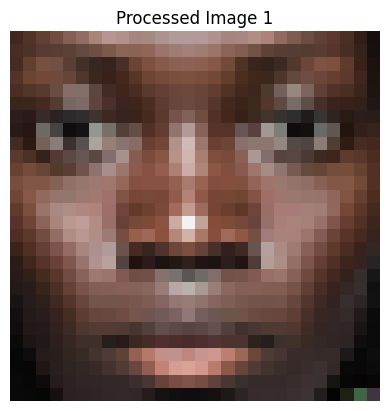

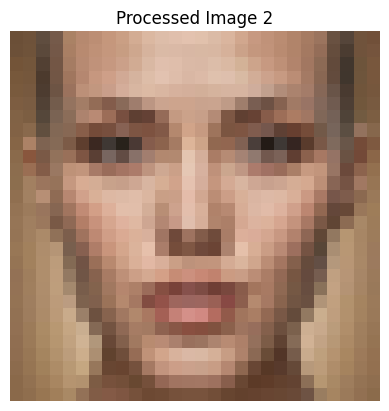

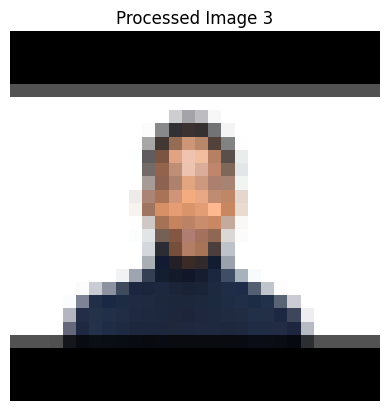

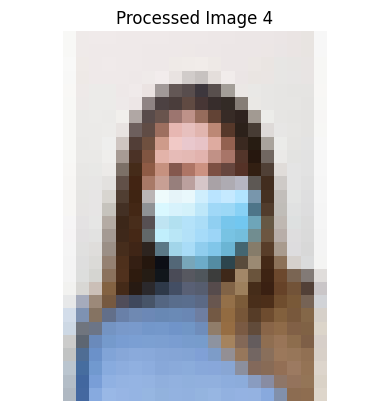

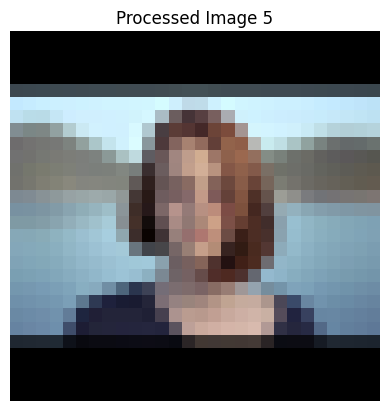

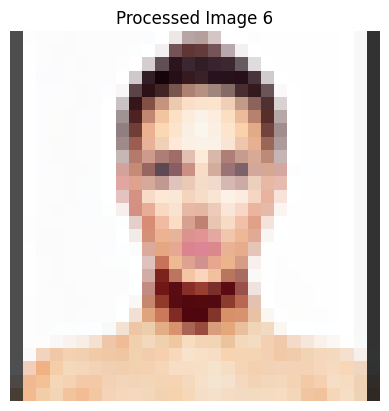

In [ ]:
import matplotlib.pyplot as plt
# Paths to the downloaded images
image_paths = ['/nomask4.jpeg', '/nomask5.jpeg', '/nomask.jpeg', '/mask3.jpeg', '/nomask2.jpeg','/nomask3.jpeg']

# Preprocess each image and store in a list
processed_images = [preprocess_image(path) for path in image_paths]

# Display the processed images
for i, img_array in enumerate(processed_images):
    plt.figure()
    plt.imshow(img_array)
    plt.title(f"Processed Image {i+1}")
    plt.axis('off')  # Turn off axis for a cleaner look
    plt.show()



In [ ]:
class_names = [
    "mask","no mask"
]

images = np.array(processed_images)
predictions = model2.predict(images)

for i, pred in enumerate(predictions):
    class_index = np.argmax(pred)  # Get the index of the class with the highest probability
    print(f"Image {i+1} predicted class: {class_names[class_index]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image 1 predicted class: no mask
Image 2 predicted class: no mask
Image 3 predicted class: mask
Image 4 predicted class: mask
Image 5 predicted class: no mask
Image 6 predicted class: no mask
